## Preparation

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import sklearn
import os
import sys
import time
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(sys.version_info)
for module in mpl, np, pd, sklearn, tf, keras:
    print(module.__name__, module.__version__)

2.4.0
sys.version_info(major=3, minor=6, micro=7, releaselevel='final', serial=0)
matplotlib 3.3.3
numpy 1.18.4
pandas 1.1.5
sklearn 0.24.0
tensorflow 2.4.0
tensorflow.keras 2.4.0


In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train_all, y_train_all), (x_test, y_test) = fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


## Normalization

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
# One shape dimension can be -1, the value is inferred from the length of the array and remaining dimensions!
x_train_scaled = scaler.fit_transform(x_train.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_valid_scaled = scaler.transform(x_valid.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)
x_test_scaled = scaler.transform(x_test.astype(np.float32).reshape(-1, 1)).reshape(-1, 28, 28)

## Modeling

In [6]:
## Model Initialization
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))

## Apply Selu
for _ in range(20):
    model.add(keras.layers.Dense(100, activation="selu"))

## Apply AlphaDropout
# model.add(keras.layers.Dropout(rate=0.5))
model.add(keras.layers.AlphaDropout(rate=0.5))

## Add the last layer (Softmax)
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy",
              optimizer = keras.optimizers.SGD(0.01),
              metrics = ["accuracy"])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

## Training

In [8]:
os.getcwd()

'C:\\Users\\A\\Desktop\\LearnTF\\xincz-notes'

In [9]:
# Tensorboard, ModelCheckpoint, EarlyStopping
# 需要文件夹和文件名
logdir = './classi-callbacks'
if not os.path.exists(logdir):
    os.mkdir(logdir)
output_model_file = os.path.join(logdir,  "fashion_mnist_model.h5")

callbacks = [
    keras.callbacks.TensorBoard(logdir),
    keras.callbacks.ModelCheckpoint(output_model_file, save_best_only = True),
    keras.callbacks.EarlyStopping(patience=5, min_delta=1e-3),
]
## Store the output in history
history = model.fit(x_train_scaled, y_train,
                    epochs=10,
                    validation_data=(x_valid_scaled, y_valid),
                    callbacks=callbacks)

Epoch 1/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.9696 - accuracy: 0.6784 - val_loss: 0.6066 - val_accuracy: 0.8498
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4677 - accuracy: 0.8432 - val_loss: 0.5984 - val_accuracy: 0.8602
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.4098 - accuracy: 0.8598 - val_loss: 0.5444 - val_accuracy: 0.8750
Epoch 4/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3736 - accuracy: 0.8666 - val_loss: 0.5066 - val_accuracy: 0.8740
Epoch 5/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3529 - accuracy: 0.8748 - val_loss: 0.5167 - val_accuracy: 0.8690
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3315 - accuracy: 0.8812 - val_loss: 0.4872 - val_accuracy: 0.8742
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3131 - accuracy: 0.8869 - val_loss: 0.5400 - val_accuracy

## Evaluation

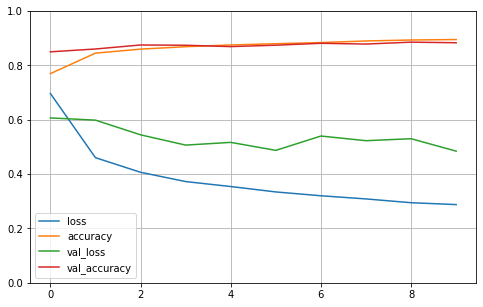

In [10]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()

plot_learning_curves(history)

In [11]:
# Loss, accuracy
model.evaluate(x_test_scaled, y_test, verbose=0)

[0.5426145792007446, 0.8734999895095825]